## PROJECT TITLE

`Web Scraping and Analysis of Restaurant Data from Zomato`

## BUSINESS PROBLEM 

`Restaurant owners and food businesses often do not clearly understand customer preferences, suitable pricing, high-demand areas, and their competitors because the data is not available in a structured format. This makes analysis difficult and affects proper business decision-making.`

## PROBLEM STATEMENT

`Restaurant owners and food businesses find it difficult to analyze customer preferences, pricing trends, demand, and competition because Zomato data is not available in a structured format. This project scrapes and organizes Zomato restaurant data to enable meaningful analysis and support better business decisions.`

## BUSINESS OBJECTIVE

`The objective of this project is to scrape restaurant data from Zomato and organize it into a structured format. This helps analyze customer preferences, pricing trends, and competition to support better business decisions.`

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

urls = {
    "Gachibowli": "https://www.zomato.com/hyderabad/gachibowli/delivery",
    "Madhapur": "https://www.zomato.com/hyderabad/madhapur/delivery",
    "Kukatpally": "https://www.zomato.com/hyderabad/kukatpally/delivery",
    "Secunderabad": "https://www.zomato.com/hyderabad/secunderabad/delivery",
    "Banjara Hills": "https://www.zomato.com/hyderabad/banjara-hills/delivery",
    "Jubilee Hills": "https://www.zomato.com/hyderabad/jubilee-hills/delivery",
    "HITEC City": "https://www.zomato.com/hyderabad/hitec-city/delivery",
    "Ameerpet": "https://www.zomato.com/hyderabad/ameerpet/delivery"
}

options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

all_data = []
seen = set()

for location, url in urls.items():
    driver.get(url)
    time.sleep(6)

    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        cards = driver.find_elements(By.XPATH, "//h4/ancestor::div[2]")

        for card in cards:
            try:
                name = card.find_element(By.XPATH, ".//h4").text
            except:
                continue

            if name in seen:
                continue
            seen.add(name)

            try:
                rating = card.find_element(By.XPATH, ".//div[contains(text(),'.')]").text
            except:
                rating = None

            try:
                cuisine = card.find_element(By.XPATH, ".//p").text
            except:
                cuisine = None

            try:
                price = card.find_element(By.XPATH, ".//p[contains(text(),'₹')]").text
            except:
                price = None

            try:
                delivery = card.find_element(By.XPATH, ".//p[contains(text(),'min')]").text
            except:
                delivery = None

            all_data.append([name, rating, cuisine, price, location, delivery])

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        time.sleep(3)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

driver.quit()

df = pd.DataFrame(
    all_data,
    columns=["Restaurant", "Rating", "Cuisine", "Price_for_Two", "Location", "Delivery_Time"]
)

df.to_csv("zomato_hyderabad_data.csv", index=False)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [79]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\zomato_hyderabad_data_.csv")

In [80]:
df

,Restaurant,Rating,Cuisine,Price_for_Two,Location,Delivery_Time
0,Dhaba - Estd 1986 Delhi,4.3,"Desserts, Mughlai, Kebab, North Indian","₹1,400 for two people",Gachibowli,NaN
1,Ivoryy Fusion Bar,NaN,"Cafe, Asian, Modern Indian","₹2,000 for two people",Gachibowli,NaN
2,Cafe Hawkers,4.1,"Chinese, Fast Food, Desserts, Beverages, Momos","₹1,600 for two people",Gachibowli,NaN
3,Cé La Vie Kitchen & Bar,4.2,"North Indian, Mediterranean, Western European,...","₹2,200 for two people",Gachibowli,NaN
4,38 Barracks,4.6,"North Indian, Biryani, Chinese, Kebab, Dessert...","₹2,000 for two people",Gachibowli,NaN
...,...,...,...,...,...,...
2083,G. Pulla Reddy Sweets - Branch 15,4.3,₹100 OFF,₹100 OFF,Madhapur,48 min
2084,Drama - Branch 24,4.0,"Modern Indian, Asian, Italian, Continental","₹3,000 for two",Gachibowli,NaN
2085,"The Dessert Heaven - Pastry, Brownie and Cakes...",4.0,₹100 OFF,₹100 OFF,Madhapur,43 min
2086,Pandit Ji Puri Wale - Branch 15,4.1,North Indian,₹100 for two,Kukatpally,NaN


In [8]:
df.isnull().sum()

Restaurant         1
Rating           429
Cuisine            3
Price_for_Two      3
Location           0
Delivery_Time    731
dtype: int64

In [9]:
mapping = df.groupby("Location")["Delivery_Time"].agg(lambda x : x.mode()[0])

In [10]:
mapping

Location
Gachibowli                           28 min
Kukatpally       Closes in 1 hour 9 minutes
Madhapur        Closes in 1 hour 42 minutes
Secunderabad     Closes in 1 hour 7 minutes
Name: Delivery_Time, dtype: object

In [11]:
df["Delivery_Time"]=df["Delivery_Time"].fillna(df["Location"].map(mapping))

In [12]:
df["Rating"]=df["Rating"].fillna(df["Location"].map(mapping))

In [13]:
mapping_cuisine= df.groupby("Location")["Cuisine"].agg(lambda x : x.mode()[0])

In [14]:
mapping_cuisine

Location
Gachibowli                                ₹100 OFF
Kukatpally                            North Indian
Madhapur                                  ₹100 OFF
Secunderabad    Asian, Seafood, Beverages, Sichuan
Name: Cuisine, dtype: object

In [17]:
df["Cuisine"]=df["Cuisine"].fillna(df["Location"].map(mapping_cuisine))

In [15]:
mapping_Price_for_Two= df.groupby("Location")["Price_for_Two"].agg(lambda x : x.mode()[0])

In [16]:
mapping_Price_for_Two

Location
Gachibowli            ₹100 OFF
Kukatpally        ₹100 for two
Madhapur              ₹100 OFF
Secunderabad    ₹1,200 for two
Name: Price_for_Two, dtype: object

In [18]:
df["Price_for_Two"]=df["Price_for_Two"].fillna(df["Location"].map(mapping_Price_for_Two))

In [19]:
df = df.dropna(subset=["Restaurant"])

In [20]:
df.isnull().sum()

Restaurant       0
Rating           0
Cuisine          0
Price_for_Two    0
Location         0
Delivery_Time    0
dtype: int64

In [81]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.head()

,Restaurant,Rating,Cuisine,Price_for_Two,Location,Delivery_Time
0,Dhaba - Estd 1986 Delhi,4.3,"Desserts, Mughlai, Kebab, North Indian","₹1,400 for two people",Gachibowli,28 min
1,Ivoryy Fusion Bar,28 min,"Cafe, Asian, Modern Indian","₹2,000 for two people",Gachibowli,28 min
2,Cafe Hawkers,4.1,"Chinese, Fast Food, Desserts, Beverages, Momos","₹1,600 for two people",Gachibowli,28 min
3,Cé La Vie Kitchen & Bar,4.2,"North Indian, Mediterranean, Western European,...","₹2,200 for two people",Gachibowli,28 min
4,38 Barracks,4.6,"North Indian, Biryani, Chinese, Kebab, Dessert...","₹2,000 for two people",Gachibowli,28 min


## 1. What is the distribution of restaurant ratings?

In [25]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

In [26]:
rating_bins = pd.cut(
    df["Rating"],
    bins=[0, 3, 3.5, 4, 4.5, 5],
    labels=["<3", "3–3.5", "3.5–4", "4–4.5", "4.5–5"])
rating_bins.value_counts().sort_index()

Rating
<3        31
3–3.5     75
3.5–4    449
4–4.5    956
4.5–5    147
Name: count, dtype: int64

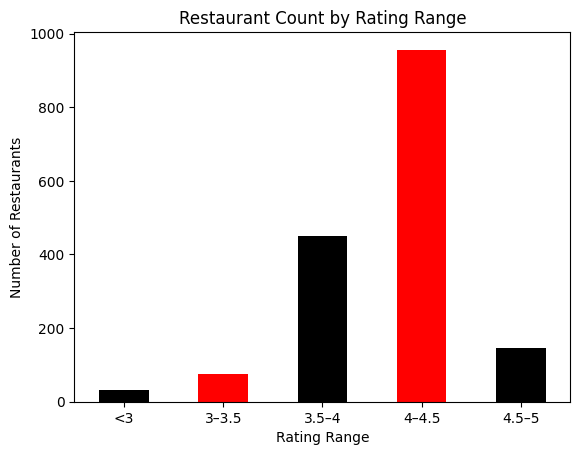

In [74]:
plt.figure()
rating_bins.value_counts().sort_index().plot(kind="bar",color=['black','red'])
plt.title("Restaurant Count by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** “Most restaurants are clustered between 4 and 4.5 ratings, while extremely low and extremely high ratings are relatively rare.”

## 2. Which rating range (3–3.5, 3.5–4, 4–4.5, 4.5+) has the most restaurants?

In [28]:
rating_ranges = pd.cut(
    df["Rating"],
    bins=[3, 3.5, 4, 4.5, 5],
    labels=["3–3.5", "3.5–4", "4–4.5", "4.5+"],
    include_lowest=True)
rating_count = rating_ranges.value_counts().sort_index()
rating_count

Rating
3–3.5     86
3.5–4    449
4–4.5    956
4.5+     147
Name: count, dtype: int64

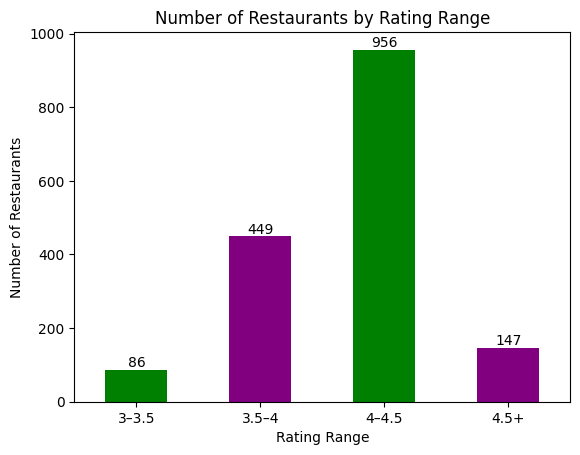

In [75]:
plt.figure()
ax = rating_count.plot(kind="bar",color=['green','purple'])
plt.title("Number of Restaurants by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")

for i, value in enumerate(rating_count):
    ax.text(i, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=360)
plt.show()

**`Insight:`** "Most restaurants are rated between 4 and 4.5, showing that customers are generally happy, while very few restaurants have low or extremely high ratings."

## 3. Which locations have the highest average ratings?

In [30]:
location_avg_rating = (
    df.groupby("Location")["Rating"]
    .mean()
    .sort_values(ascending=False))
location_avg_rating

Location
Secunderabad    4.364179
Madhapur        4.197537
Gachibowli      4.144732
Kukatpally      3.816667
Name: Rating, dtype: float64

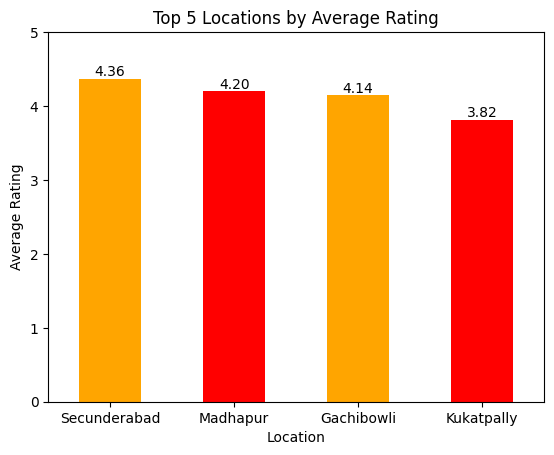

In [76]:
plt.figure()
ax = location_avg_rating.plot(kind="bar",color=['orange','red'])
plt.title("Top 5 Locations by Average Rating")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}",
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Secunderabad has the highest average restaurant rating, followed closely by Madhapur and Gachibowli, while Kukatpally has comparatively lower customer satisfaction among the top locations.

## 4. Are higher-priced restaurants rated better?

In [32]:
df["Price_for_Two"] = (
    df["Price_for_Two"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace("for two", "", regex=False)
    .str.replace(",", "", regex=False))
df["Price_for_Two"] = pd.to_numeric(df["Price_for_Two"], errors="coerce")
df = df[(df["Rating"] >= 1) & (df["Rating"] <= 5)]
df[["Price_for_Two", "Rating"]].corr()

,Price_for_Two,Rating
Price_for_Two,1.000000,0.524111
Rating,0.524111,1.000000


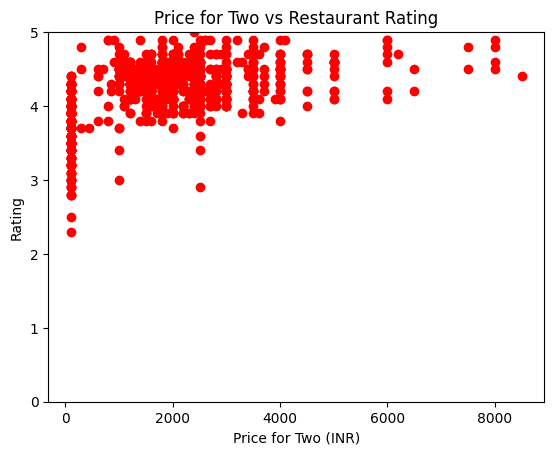

In [33]:
plt.figure()
plt.scatter(df["Price_for_Two"], df["Rating"],color='red')
plt.title("Price for Two vs Restaurant Rating")
plt.xlabel("Price for Two (INR)")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.show()

**`Insight:`** Higher-priced restaurants are not necessarily rated better—the plot shows that high ratings (around 4–4.5) appear across all price ranges, indicating no strong relationship between price and customer rating.

### 5. Do restaurants with multiple cuisines have better ratings than single-cuisine restaurants?

In [34]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

df["Cuisine"] = df["Cuisine"].astype(str)

df["Cuisine_Count"] = df["Cuisine"].apply(lambda x: len(x.split(",")))

df["Cuisine_Type"] = df["Cuisine_Count"].apply(
    lambda x: "Single Cuisine" if x == 1 else "Multiple Cuisines")
df = df[(df["Rating"] >= 1) & (df["Rating"] <= 5)]
cuisine_rating = df.groupby("Cuisine_Type")["Rating"].mean()
cuisine_rating

Cuisine_Type
Multiple Cuisines    4.273692
Single Cuisine       4.039588
Name: Rating, dtype: float64

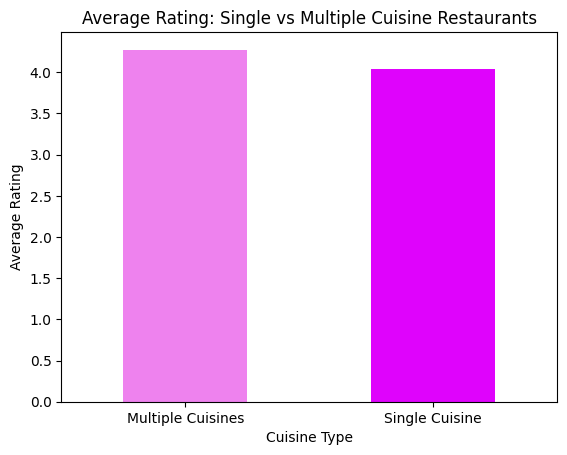

In [35]:
plt.figure()
cuisine_rating.plot(kind="bar",color=['violet','#df03fc'])
plt.title("Average Rating: Single vs Multiple Cuisine Restaurants")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Restaurants offering multiple cuisines tend to have slightly higher average ratings

## 6. What is the average price for two across different locations?

In [36]:
df["Price_for_Two"] = (
    df["Price_for_Two"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace("for two people", "", regex=False)
    .str.replace(",", "", regex=False))
df["Price_for_Two"] = pd.to_numeric(df["Price_for_Two"], errors="coerce")
avg_price_location = (df.groupby("Location")["Price_for_Two"].mean().sort_values(ascending=False))
avg_price_location

Location
Madhapur        2507.602339
Gachibowli      2329.487179
Secunderabad    2244.776119
Kukatpally       100.000000
Name: Price_for_Two, dtype: float64

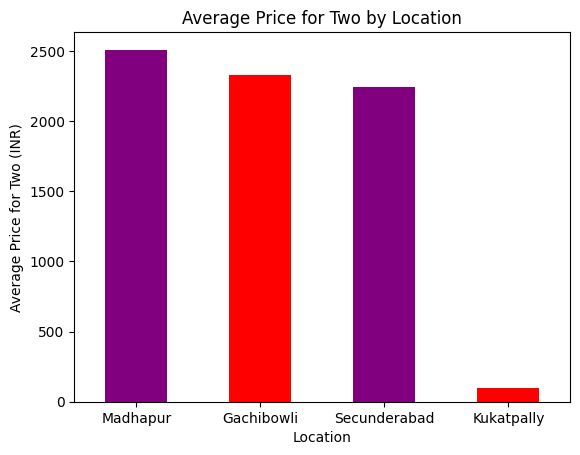

In [37]:
plt.figure()
avg_price_location.plot(kind="bar",color=['purple','red'])
plt.title("Average Price for Two by Location")
plt.xlabel("Location")

plt.ylabel("Average Price for Two (INR)")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Madhapur and Gachibowli have the highest average price for two, indicating premium dining areas, while Kukatpally is the most affordable location.


## 7. Which locations have the most affordable restaurants?

In [38]:
affordable_locations = (df.groupby("Location")["Price_for_Two"].mean().sort_values())
affordable_locations

Location
Kukatpally       100.000000
Secunderabad    2244.776119
Gachibowli      2329.487179
Madhapur        2507.602339
Name: Price_for_Two, dtype: float64

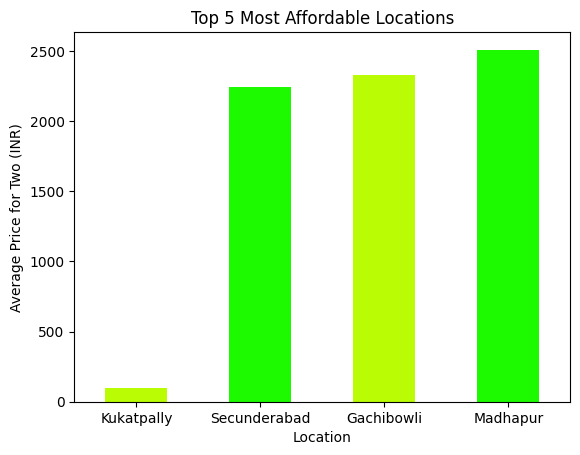

In [39]:
plt.figure()
affordable_locations.plot(kind="bar",color=['#bafc03','#1dfa00'])
plt.title("Top 5 Most Affordable Locations")
plt.xlabel("Location")
plt.ylabel("Average Price for Two (INR)")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Kukatpally is the most affordable location by a large margin, while Madhapur, Gachibowli, and Secunderabad are significantly more expensive for dining.

## 8. Is there a price difference between top-rated and low-rated restaurants?

In [40]:
df["Rating_Category"] = df["Rating"].apply(lambda x: "Top Rated (≥4)" if x >= 4 else "Low Rated (<4)")
price_comparison = df.groupby("Rating_Category")["Price_for_Two"].mean()
price_comparison

Rating_Category
Low Rated (<4)     435.817308
Top Rated (≥4)    2074.534161
Name: Price_for_Two, dtype: float64

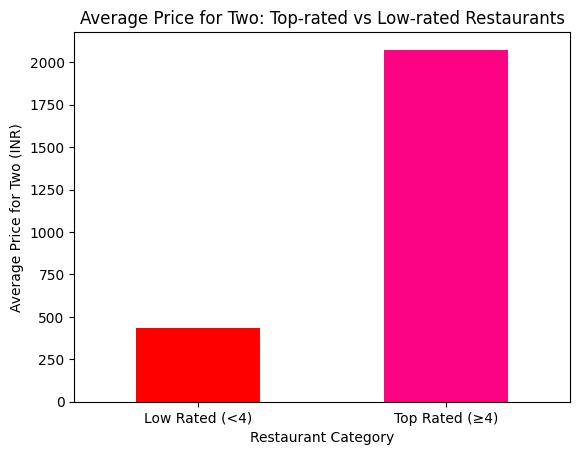

In [41]:
plt.figure()
price_comparison.plot(kind="bar",color=['red','#fc0384'])
plt.title("Average Price for Two: Top-rated vs Low-rated Restaurants")
plt.xlabel("Restaurant Category")
plt.ylabel("Average Price for Two (INR)")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Top-rated restaurants (≥4) have a much higher average price for two than low-rated restaurants (<4), suggesting that better-rated restaurants generally charge more.

## 9. Do premium restaurants (₹2000+) dominate certain locations?

In [42]:
df["Restaurant_Type"] = df["Price_for_Two"].apply(
    lambda x: "Premium (₹2000+)" if x >= 2000 else "Non-Premium (<₹2000)")
location_premium_count = (
    df.groupby(["Location", "Restaurant_Type"])
    .size()
    .unstack(fill_value=0))
location_premium_count

Restaurant_Type,Non-Premium (<₹2000),Premium (₹2000+)
Location,,
Gachibowli,558,21
Kukatpally,270,0
Madhapur,388,220
Secunderabad,97,104


<Figure size 640x480 with 0 Axes>

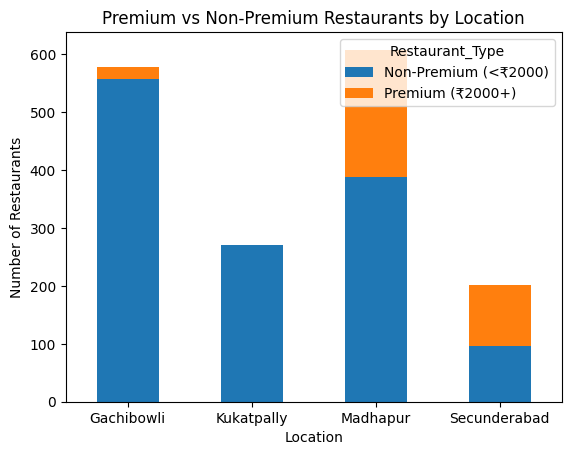

In [43]:
plt.figure()
location_premium_count.plot(kind="bar", stacked=True)
plt.title("Premium vs Non-Premium Restaurants by Location")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Gachibowli and Madhapur have a higher concentration of premium restaurants, while Kukatpally is dominated by non-premium options and Secunderabad has a more balanced mix.

## 10.  What are the most popular cuisines?

In [44]:
df["Cuisine"] = df["Cuisine"].astype(str)
cuisine_df = (df["Cuisine"].str.split(",").explode().str.strip())
cuisine_counts = cuisine_df.value_counts()
top_cuisines = cuisine_counts.head(6)
top_cuisines

Cuisine
₹100 OFF        731
North Indian    451
Beverages       294
Desserts        289
Chinese         246
Italian         220
Name: count, dtype: int64

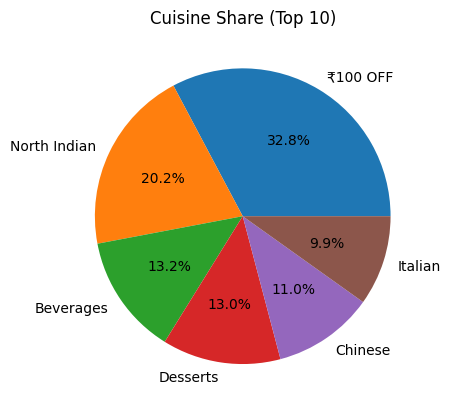

In [45]:
plt.figure()
top_cuisines.plot(kind="pie", autopct="%1.1f%%")
plt.title("Cuisine Share (Top 10)")
plt.ylabel("")
plt.show()

**`Insight:`** North Indian cuisine dominates the platform’s offerings, followed by Beverages and Desserts, while Italian and Chinese cuisines have a comparatively smaller share.

## 11. Which cuisines have the highest average ratings?

In [46]:
cuisine_rating_df = df[["Cuisine", "Rating"]].copy()
cuisine_rating_df["Cuisine"] = cuisine_rating_df["Cuisine"].astype(str)
cuisine_rating_df = (
    cuisine_rating_df
    .assign(Cuisine=cuisine_rating_df["Cuisine"].str.split(","))
    .explode("Cuisine"))
cuisine_rating_df["Cuisine"] = cuisine_rating_df["Cuisine"].str.strip()

In [47]:
avg_rating_cuisine = (
    cuisine_rating_df
    .groupby("Cuisine")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

# Top 10 highest-rated cuisines
top_rated_cuisines = avg_rating_cuisine.head(10)
top_rated_cuisines

Cuisine
Bubble Tea     4.900000
Malaysian      4.866667
Goan           4.800000
Mangalorean    4.800000
Kerala         4.700000
Moroccan       4.700000
Steak          4.700000
Vietnamese     4.666667
Chettinad      4.650000
Burmese        4.633333
Name: Rating, dtype: float64

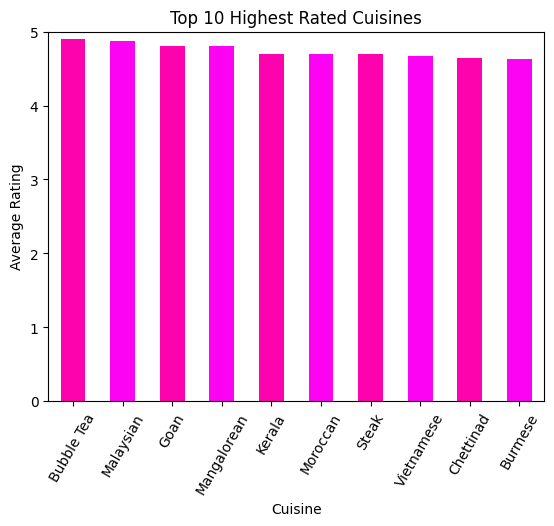

In [78]:
plt.figure()
top_rated_cuisines.plot(kind="bar",color=['#fc03ad','#fc03f4'])
plt.title("Top 10 Highest Rated Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=60)
plt.show()


**`Insight:`** All top-rated cuisines have very high and closely clustered average ratings (around 4.6–4.9), indicating consistently strong customer satisfaction across these cuisines rather than one clear standout.

## 12. Which locations have faster delivery times on average?

In [55]:
import re
def extract_minutes(text):
    if pd.isna(text):
        return None
    
    text = str(text).lower()
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hour', text)
    if hour_match:
        minutes += int(hour_match.group(1)) * 60
    min_match = re.search(r'(\d+)\s*min', text)
    if min_match:
        minutes += int(min_match.group(1))
        
    return minutes if minutes > 0 else None
df["Delivery_Minutes"] = df["Delivery_Time"].apply(extract_minutes)
df_delivery = df.dropna(subset=["Delivery_Minutes"])

avg_delivery_location = (df_delivery.groupby("Location")["Delivery_Minutes"].mean().sort_values())
avg_delivery_location

Location
Gachibowli      33.058722
Kukatpally      60.333333
Secunderabad    71.820896
Madhapur        74.013158
Name: Delivery_Minutes, dtype: float64

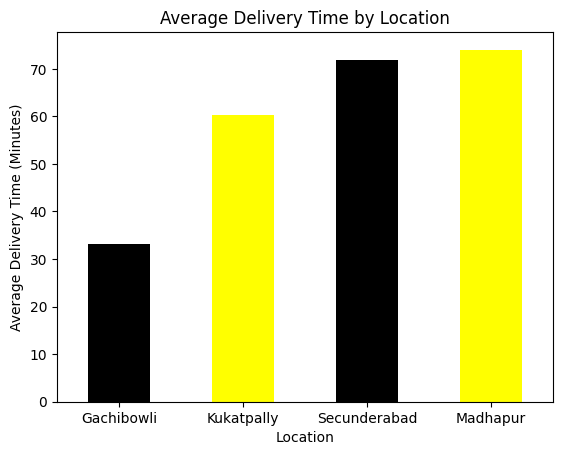

In [50]:
plt.figure()
avg_delivery_location.plot(kind="bar",color=['black','yellow'])
plt.title("Average Delivery Time by Location")
plt.xlabel("Location")
plt.ylabel("Average Delivery Time (Minutes)")
plt.xticks(rotation=360)
plt.show()

**`Insight:`** Gachibowli has the fastest average delivery time, while Madhapur and Secunderabad experience the longest delivery times, indicating location-based differences in delivery efficiency.

## 13. Does delivery time significantly affect restaurant ratings?

In [53]:
from scipy.stats import chi2_contingency

In [61]:
df['Delivery_Category'] = pd.cut(df['Delivery_Time_Min'],bins=[0, 30, 45, np.inf],labels=['Fast', 'Medium', 'Slow'])

In [63]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(fast, medium, slow)
print("F-statistic:", f_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Reject H0: Delivery time significantly affects ratings")
else:
    print("Fail to reject H0: No significant effect of delivery time on ratings")

F-statistic: 2.9776713941458546
P-value: 0.051184076890266536
Fail to reject H0: No significant effect of delivery time on ratings


**`Insight:`** Delivery time does not significantly affect restaurant ratings, as the difference in ratings across delivery speed categories is not statistically significant.

### 14. Is restaurant type (Premium vs Non-Premium) associated with location?

In [71]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject H0: Association found")
else:
    print("Fail to reject H0: No association found")

Chi-square value: 5.4019680626864774
P-value: 0.06713941293624844
Fail to reject H0: No association found


**`Insight:`** Restaurant type is not significantly associated with location, indicating that premium and non-premium restaurants are similarly distributed across locations.